### Цель проекта:
Аналитика в стартапе, который создает новый маркетплейс. Он недавно появился на рынке и занимается продажей новых товаров из Бразилии, которые только начинают поступать в продажу.

Выручка маркетплейса стоит на месте уже несколько месяцев.

### Список задач:

* Задача 1: Оценить месячный retention в оформление заказа с помощью когортного анализа.
    
* Задача 2: Определить, существует ли product/market fit у этого маркетплейса.
    
* Задача 3: Определить 5 основных метрик, на которых продакту можно сконцентрироваться, чтобы максимизировать прибыль компании.
    
* Задача 4: Выбрать одну из 3 основных гипотез с помощью фреймворка ICE.
    
* Задача 5: Сформулировать нужные метрики, на которые ваша гипотеза должна повлиять.
    
* Задача 6: Сформулировать выводы о проделанной работе и составить отчет.

#### Cхема БД 
<img src="olist_er_diagram.png" width="600" height="400">

<div style="text-align: left;">

  <h4 style="text-align: left;">🧑‍💼 Таблица <code>customers</code> (Клиенты)</h4>
  <table style="margin: 0;">
    <thead>
      <tr>
        <th>Столбец</th>
        <th>Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td><strong>customer_id</strong></td>
        <td>Уникальный идентификатор клиента</td>
      </tr>
      <tr>
        <td>customer_unique_id</td>
        <td>Идентификатор клиента (несколько заказов одного клиента)</td>
      </tr>
      <tr>
        <td>customer_zip_code_prefix</td>
        <td>Почтовый индекс клиента</td>
      </tr>
      <tr>
        <td>customer_city</td>
        <td>Город клиента</td>
      </tr>
      <tr>
        <td>customer_state</td>
        <td>Штат клиента</td>
      </tr>
    </tbody>
  </table>
</div>

##### Описание таблиц

<div style="text-align: left;">
  <h4 style="text-align: left;">📦 Таблица <code>orders</code> (Заказы)</h4>
  <table style="margin: 0;">
    <thead>
      <tr>
        <th>Столбец</th>
        <th>Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td><strong>order_id</strong></td>
        <td>Уникальный идентификатор заказа</td>
      </tr>
      <tr>
        <td>customer_id</td>
        <td>Идентификатор клиента</td>
      </tr>
      <tr>
        <td>order_status</td>
        <td>Статус заказа</td>
      </tr>
      <tr>
        <td>order_purchase_timestamp</td>
        <td>Время создания заказа</td>
      </tr>
      <tr>
        <td>order_approved_at</td>
        <td>Время подтверждения оплаты</td>
      </tr>
      <tr>
        <td>order_delivered_carrier_date</td>
        <td>Время передачи заказа службе доставки</td>
      </tr>
      <tr>
        <td>order_delivered_customer_date</td>
        <td>Время доставки клиенту</td>
      </tr>
      <tr>
        <td>order_estimated_delivery_date</td>
        <td>Планируемая дата доставки</td>
      </tr>
    </tbody>
  </table>
</div>

<div style="text-align: left;">
  <h4 style="text-align: left;">📑 Таблица <code>order_items</code> (Товары в заказах)</h4>
  <table style="margin: 0;">
    <thead>
      <tr>
        <th>Столбец</th>
        <th>Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td><strong>id</strong></td>
        <td>Уникальный идентификатор записи</td>
      </tr>
      <tr>
        <td>order_id</td>
        <td>Идентификатор заказа</td>
      </tr>
      <tr>
        <td>order_item_id</td>
        <td>Номер товара в заказе</td>
      </tr>
      <tr>
        <td>product_id</td>
        <td>Идентификатор товара</td>
      </tr>
      <tr>
        <td>seller_id</td>
        <td>Идентификатор продавца</td>
      </tr>
      <tr>
        <td>shipping_limit_date</td>
        <td>Срок передачи товара для доставки</td>
      </tr>
      <tr>
        <td>price</td>
        <td>Цена товара</td>
      </tr>
      <tr>
        <td>freight_value</td>
        <td>Стоимость доставки</td>
      </tr>
    </tbody>
  </table>
</div>

<div style="text-align: left;">
  <h4 style="text-align: left;">🎁 Таблица <code>products</code> (Товары)</h4>
  <table style="margin: 0;">
    <thead>
      <tr>
        <th>Столбец</th>
        <th>Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td><strong>product_id</strong></td>
        <td>Уникальный идентификатор товара</td>
      </tr>
      <tr>
        <td>product_category_name</td>
        <td>Категория товара (на португальском)</td>
      </tr>
      <tr>
        <td>product_name_lenght</td>
        <td>Длина названия товара</td>
      </tr>
      <tr>
        <td>product_description_lenght</td>
        <td>Длина описания товара</td>
      </tr>
      <tr>
        <td>product_photos_qty</td>
        <td>Количество фотографий товара</td>
      </tr>
      <tr>
        <td>product_weight_g</td>
        <td>Вес товара (г)</td>
      </tr>
      <tr>
        <td>product_length_cm</td>
        <td>Длина товара (см)</td>
      </tr>
      <tr>
        <td>product_height_cm</td>
        <td>Высота товара (см)</td>
      </tr>
      <tr>
        <td>product_width_cm</td>
        <td>Ширина товара (см)</td>
      </tr>
    </tbody>
  </table>
</div>

<div style="text-align: left;">
  <h4 style="text-align: left;">🏪 Таблица <code>sellers</code> (Продавцы)</h4>
  <table style="margin: 0;">
    <thead>
      <tr>
        <th>Столбец</th>
        <th>Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td><strong>seller_id</strong></td>
        <td>Уникальный идентификатор продавца</td>
      </tr>
      <tr>
        <td>seller_zip_code_prefix</td>
        <td>Почтовый индекс продавца</td>
      </tr>
      <tr>
        <td>seller_city</td>
        <td>Город продавца</td>
      </tr>
      <tr>
        <td>seller_state</td>
        <td>Штат продавца</td>
      </tr>
    </tbody>
  </table>
</div>

<div style="text-align: left;">
  <h4 style="text-align: left;">🗺️ Таблица <code>geolocation</code> (Геоданные)</h4>
  <table style="margin: 0;">
    <thead>
      <tr>
        <th>Столбец</th>
        <th>Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td><strong>id</strong></td>
        <td>Уникальный идентификатор строки</td>
      </tr>
      <tr>
        <td>geolocation_zip_code_prefix</td>
        <td>Почтовый индекс</td>
      </tr>
      <tr>
        <td>geolocation_lat</td>
        <td>Широта</td>
      </tr>
      <tr>
        <td>geolocation_lng</td>
        <td>Долгота</td>
      </tr>
      <tr>
        <td>geolocation_city</td>
        <td>Название города</td>
      </tr>
      <tr>
        <td>geolocation_state</td>
        <td>Штат</td>
      </tr>
    </tbody>
  </table>
</div>

<div style="text-align: left;">
 <h4 style="text-align: left;">💬 Таблица <code>order_reviews</code> (Отзывы)</h4>
  <table style="margin: 0;">
    <thead>
      <tr>
        <th>Столбец</th>
        <th>Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td><strong>id</strong></td>
        <td>Уникальный идентификатор отзыва</td>
      </tr>
      <tr>
        <td>review_id</td>
        <td>Идентификатор отзыва от клиента</td>
      </tr>
      <tr>
        <td>order_id</td>
        <td>Идентификатор заказа</td>
      </tr>
      <tr>
        <td>review_score</td>
        <td>Оценка заказа (1-5)</td>
      </tr>
      <tr>
        <td>review_comment_title</td>
        <td>Заголовок отзыва</td>
      </tr>
      <tr>
        <td>review_comment_message</td>
        <td>Текст отзыва</td>
      </tr>
      <tr>
        <td>review_creation_date</td>
        <td>Дата создания отзыва</td>
      </tr>
      <tr>
        <td>review_answer_timestamp</td>
        <td>Дата ответа на отзыв</td>
      </tr>
    </tbody>
  </table>
</div>

<div style="text-align: left;">
 <h4 style="text-align: left;">💳 Таблица <code>order_payments</code> (Платежи)</h4>
  <table style="margin: 0;">
    <thead>
      <tr>
        <th>Столбец</th>
        <th>Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td><strong>id</strong></td>
        <td>Уникальный идентификатор платежа</td>
      </tr>
      <tr>
        <td>order_id</td>
        <td>Идентификатор заказа</td>
      </tr>
      <tr>
        <td>payment_sequential</td>
        <td>Порядковый номер платежа в заказе</td>
      </tr>
      <tr>
        <td>payment_type</td>
        <td>Тип платежа (например, credit_card, boleto)</td>
      </tr>
      <tr>
        <td>payment_installments</td>
        <td>Количество платежей (рассрочка)</td>
      </tr>
      <tr>
        <td>payment_value</td>
        <td>Сумма платежа</td>
      </tr>
    </tbody>
  </table>
</div>

<h4 style="text-align: left;">🌐 Таблица <code>product_category_name_translation</code> (Перевод категорий товаров)</h4>
  <table style="margin: 0;">
    <thead>
      <tr>
        <th>Столбец</th>
        <th>Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>product_category_name</td>
        <td>Название категории на португальском языке</td>
      </tr>
      <tr>
        <td>product_category_name_english</td>
        <td>Название категории на английском языке</td>
      </tr>
    </tbody>
  </table>
</div>

### 1. Загрузка данных и первичный анализ 

#### 1.1. Импорт библиотек и загрузка данных

In [5]:
#Импортируем необходимые библиотеки
import os
import pandas as pd
from sqlalchemy import create_engine, text
from sqlalchemy.exc import SQLAlchemyError
from tqdm import tqdm
from dotenv import load_dotenv
import numpy as np
from operator import attrgetter
import seaborn as sns, matplotlib.ticker as mtick
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors

In [6]:
load_dotenv()  # Загружает переменные из файла .env

True

In [7]:
#Создаем подключение
connection_string = os.getenv("DB_CONN")
engine = create_engine(connection_string)

In [8]:
def select(sql):
    return pd.read_sql(sql, engine)

In [9]:
sql = '''
SELECT *
FROM order_items
'''

#### 1.2. Первичный осмотр данных

In [10]:
items = select(sql)

In [11]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,id
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,3
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,5


In [14]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
 7   id                   112650 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.9+ MB


In [12]:
sql = '''
SELECT *
FROM orders
'''

In [13]:
orders = select(sql)

In [15]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [18]:
sql = '''
SELECT *
FROM customers
'''

In [19]:
customers = select(sql)

In [20]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [21]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


#### 1.3 Вывод
1) Из описания параметров видно, что необходимо преобразовать тип столбцов в datetime: 
* `shipping_limit_date`,
* `order_purchase_timestamp`,
* `order_approved_at`,
* `order_delivered_carrier_date`,
* `order_delivered_customer_date`,
* `order_estimated_delivery_date`.
   
2) Из информации о датасете видно, что в таблице `orders` имеются пропуски в столбцах:
* `order_approved_at`,
* `order_delivered_carrier_date`,
* `order_delivered_customer_date`.

3) В остальных столбцах пропусков и несоответствий не обнаружено.

### 2. Предобработка данных 

#### 2.1 Первичная подготовка данных

In [46]:
items['shipping_limit_date'] = pd.to_datetime(items['shipping_limit_date'])

In [47]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [48]:
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])

In [49]:
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])

In [50]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

In [51]:
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

#### 2.2 Работа с пропущенными значениями

Посмотрим на те строки, в которых есть пропуски

In [24]:
mask = orders.isna().any(axis=1)

In [25]:
nat_orders = orders[mask]

In [26]:
nat_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,None,None,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,None,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,None,None,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,None,None,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,None,2018-02-07 00:00:00


In [27]:
nat_orders.shape

(2980, 8)

In [55]:
#время создания первого заказа
nat_orders['order_purchase_timestamp'].min()

Timestamp('2016-09-04 21:15:19')

In [56]:
#время создания последнего заказа
nat_orders['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

In [57]:
nat_orders['order_status'].value_counts()

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered        23
created           5
approved          2
Name: count, dtype: int64

In [58]:
nat_orders.query('order_status=="delivered"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
5324,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16


### 2.3 Вывод
Преобразовали тип данных в datetime

Из всех заказов, с хотябы одной пропущенной датой всего 23 заказа имеют статус `delivered`  и были доставлены пользователю, у 8 заказов со статусом `delivered` нет даты доставки, возможно это техническая ошибка.

Большинство заказов c пропущенной датой имеют статус:
* `shipped` (отгружен со склада) - 1107, 
* `canceled` (отменен) - 619,
* `unavailable` (отменён по причине недоступности товара) - 609. 


Будем считать, что даты пропущены т.к. достваки еще не завершена:
не подтверждена оплата, товар не передан в логистическую службу или еще не доставлен логистической службой до пользователя.

Если понадобиться работать только с доставленными товарами и столбцом `order_delivered_customer_date`, то можем либо удалить пропущенные значения, либо  заполнить пропуски в `order_delivered_customer_date` значениями столбца `order_estimated_delivery_date` + среднее отклонение уже доставленных товаров от обещанной даты доставки (`order_delivered_customer_date` - `order_estimated_delivery_date`).mean().

### 3. Создание новых признаков и расчёты

#### 3.1 Когортный анализ

Для расчета месячного retention в оформление заказа с помощью когортного анализа, будем учитывать только успешно завершённые заказы со статусом `delivered` и дату оформления заказа (`order_purchase_timestamp`). 

Вот почему:
* Заказы со статусами `canceled` или `unavailable` по определению не приносят ценности: человек либо не оплатил, либо товар не был в наличии.
* `invoiced`, `processing` и `shipped` — промежуточные стадии, после которых всё ещё возможна отмена или возврат.

Объеденим таблицы `customers` и `orders` по полю `customer_id` с сохранением всех значений слева

In [59]:
merged_customers_orders = pd.merge(
    customers,
    orders,
    on='customer_id',
    how='left'
)

In [60]:
merged_customers_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


In [61]:
#Посмотрим количество заказов по статусу
merged_customers_orders['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [62]:
#Выберем только доставленные заказы
orders_delivered = merged_customers_orders.query('order_status == "delivered"')

In [63]:
orders_delivered = orders_delivered[['customer_unique_id','order_purchase_timestamp', 'order_id']]

In [64]:
orders_delivered

,customer_unique_id,order_purchase_timestamp,order_id
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,00e7ee1b050b8499577073aeb2a297a1
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,29150127e6685892b6eab3eec79f59c7
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,b2059ed67ce144a36e2aa97d2c9e9ad2
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,951670f92359f4fe4a63112aa7306eba
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,6b7d50bd145f6fc7f33cebabd7e49d0f
...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-07 15:48:17,6760e20addcf0121e9d58f2f1ff14298
99437,d52a67c98be1cf6a5c84435bd38d095d,2018-04-04 08:20:22,9ec0c8947d973db4f4e8dcf1fbfa8f1b
99438,e9f50caf99f032f0bf3c55141f019d99,2018-04-08 20:11:50,fed4434add09a6f332ea398efd656a5c
99439,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:08:33,e31ec91cea1ecf97797787471f98a8c2


In [65]:
#Извлечем месяц и день заказа
orders_delivered['order_period'] = orders_delivered['order_purchase_timestamp'].dt.to_period('M')
orders_delivered['order_period_day'] = orders_delivered['order_purchase_timestamp'].dt.to_period('D')

In [66]:
orders_delivered

,customer_unique_id,order_purchase_timestamp,order_id,order_period,order_period_day
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,00e7ee1b050b8499577073aeb2a297a1,2017-05,2017-05-16
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,29150127e6685892b6eab3eec79f59c7,2018-01,2018-01-12
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05,2018-05-19
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,951670f92359f4fe4a63112aa7306eba,2018-03,2018-03-13
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07,2018-07-29
...,...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-07 15:48:17,6760e20addcf0121e9d58f2f1ff14298,2018-04,2018-04-07
99437,d52a67c98be1cf6a5c84435bd38d095d,2018-04-04 08:20:22,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04,2018-04-04
99438,e9f50caf99f032f0bf3c55141f019d99,2018-04-08 20:11:50,fed4434add09a6f332ea398efd656a5c,2018-04,2018-04-08
99439,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:08:33,e31ec91cea1ecf97797787471f98a8c2,2017-11,2017-11-03


In [67]:
# Присвоем когорты на основе даты первого действия для каждого пользователя
orders_delivered['cohort'] = orders_delivered.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
orders_delivered['cohort_day'] = orders_delivered.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('D')

In [68]:
orders_delivered

,customer_unique_id,order_purchase_timestamp,order_id,order_period,order_period_day,cohort,cohort_day
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,00e7ee1b050b8499577073aeb2a297a1,2017-05,2017-05-16,2017-05,2017-05-16
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,29150127e6685892b6eab3eec79f59c7,2018-01,2018-01-12,2018-01,2018-01-12
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05,2018-05-19,2018-05,2018-05-19
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,951670f92359f4fe4a63112aa7306eba,2018-03,2018-03-13,2018-03,2018-03-13
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07,2018-07-29,2018-07,2018-07-29
...,...,...,...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-07 15:48:17,6760e20addcf0121e9d58f2f1ff14298,2018-04,2018-04-07,2018-04,2018-04-07
99437,d52a67c98be1cf6a5c84435bd38d095d,2018-04-04 08:20:22,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04,2018-04-04,2018-04,2018-04-04
99438,e9f50caf99f032f0bf3c55141f019d99,2018-04-08 20:11:50,fed4434add09a6f332ea398efd656a5c,2018-04,2018-04-08,2018-04,2018-04-08
99439,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:08:33,e31ec91cea1ecf97797787471f98a8c2,2017-11,2017-11-03,2017-11,2017-11-03


In [74]:
#Рассчитаем номер периода в днях (месячные периоды, деля на 30)
orders_delivered['period_number_month'] = np.floor((orders_delivered['order_period_day'] - orders_delivered['cohort_day']).apply(attrgetter('n')) / 30)

In [75]:
#Посмотрим на распределение периодов
orders_delivered['period_number_month'].value_counts()

period_number_month
0.0     94835
1.0       325
2.0       239
3.0       182
4.0       165
5.0       139
6.0       124
7.0        94
8.0        74
9.0        73
11.0       57
10.0       56
13.0       32
12.0       26
14.0       23
15.0       12
16.0        9
17.0        8
19.0        3
20.0        1
21.0        1
Name: count, dtype: int64

In [76]:
#Агрегируем данные по когортам и рассчитанному номеру периода (в месяцах)
df_cohort = orders_delivered.groupby(['cohort', 'period_number_month']).agg(n_customers=('customer_unique_id', 'nunique')).reset_index()

In [77]:
df_cohort

,cohort,period_number_month,n_customers
0,2016-09,0.0,1
1,2016-10,0.0,262
2,2016-10,6.0,1
3,2016-10,9.0,1
4,2016-10,11.0,1
...,...,...,...
210,2018-06,1.0,22
211,2018-06,2.0,6
212,2018-07,0.0,5949
213,2018-07,1.0,6


In [78]:
#Создаем сводную таблицу для когортного анализа
cohort_pivot = df_cohort.pivot_table(index='cohort', columns='period_number_month', values='n_customers')

In [79]:
#Рассчитываем размеры когорт (первый столбец сводной таблицы)
cohort_size = cohort_pivot.iloc[:, 0]

In [80]:
cohort_size

cohort
2016-09       1.0
2016-10     262.0
2016-12       1.0
2017-01     717.0
2017-02    1628.0
2017-03    2503.0
2017-04    2256.0
2017-05    3451.0
2017-06    3037.0
2017-07    3752.0
2017-08    4057.0
2017-09    4004.0
2017-10    4328.0
2017-11    7060.0
2017-12    5338.0
2018-01    6842.0
2018-02    6288.0
2018-03    6774.0
2018-04    6582.0
2018-05    6506.0
2018-06    5878.0
2018-07    5949.0
2018-08    6144.0
Freq: M, Name: 0.0, dtype: float64

In [81]:
#Вычисляем коэффициенты удержания, деля на размер когорты
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

In [82]:
retention_matrix

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,...,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.003817,0.003817
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,NaN,0.005579,0.001395,0.001395,0.002789,0.002789,NaN,NaN,...,0.005579,0.004184,0.002789,NaN,0.002789,0.002789,0.002789,0.001395,NaN,NaN
2017-02,1.0,0.001229,0.001843,0.003686,0.002457,0.001229,0.002457,0.000614,0.001229,0.002457,...,0.003686,0.000614,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN,NaN
2017-03,1.0,0.002797,0.005194,0.004395,0.001199,0.000799,0.003596,0.001598,0.002397,0.002397,...,0.001598,0.001598,0.001199,0.002797,0.000799,0.001199,0.000799,NaN,NaN,NaN
2017-04,1.0,0.003546,0.002660,0.000443,0.002660,0.003546,0.002660,0.004433,0.002216,0.002660,...,0.001330,NaN,0.000887,0.000887,0.000887,0.000887,NaN,NaN,NaN,NaN
2017-05,1.0,0.004057,0.004057,0.002318,0.003767,0.003187,0.003187,0.001159,0.002898,0.002608,...,0.003187,0.001739,0.000869,0.002028,0.001159,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.004281,0.004939,0.003622,0.001646,0.005268,0.002963,0.001976,0.001317,0.003293,...,0.002963,0.000988,0.002963,0.001317,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
ACCENT       = "#2a9d8f"   # Основной цвет (зелёный)
GRID_COLOR   = "lightgray" # цвет вспомогательной сетки
HIGHLIGHT    = "#e76f51"   # точечная подсветка (плато)
THRESHOLD_C  = "#e63946"   # красный порог PMF

In [87]:
sns.set_theme(style="white")  # белый фон без базовой сетки

plt.rcParams.update({
    "axes.titlesize":   12,
    "axes.labelsize":   11,
    "xtick.labelsize":  10,
    "ytick.labelsize":  10,
    "axes.grid":        False,
    "grid.color":       GRID_COLOR,
    "grid.linestyle":   "--",
    "grid.linewidth":   0.5,
    "axes.spines.right": False,
    "axes.spines.top":   False,
    "xtick.major.size": 0,
    "ytick.major.size": 0,
})

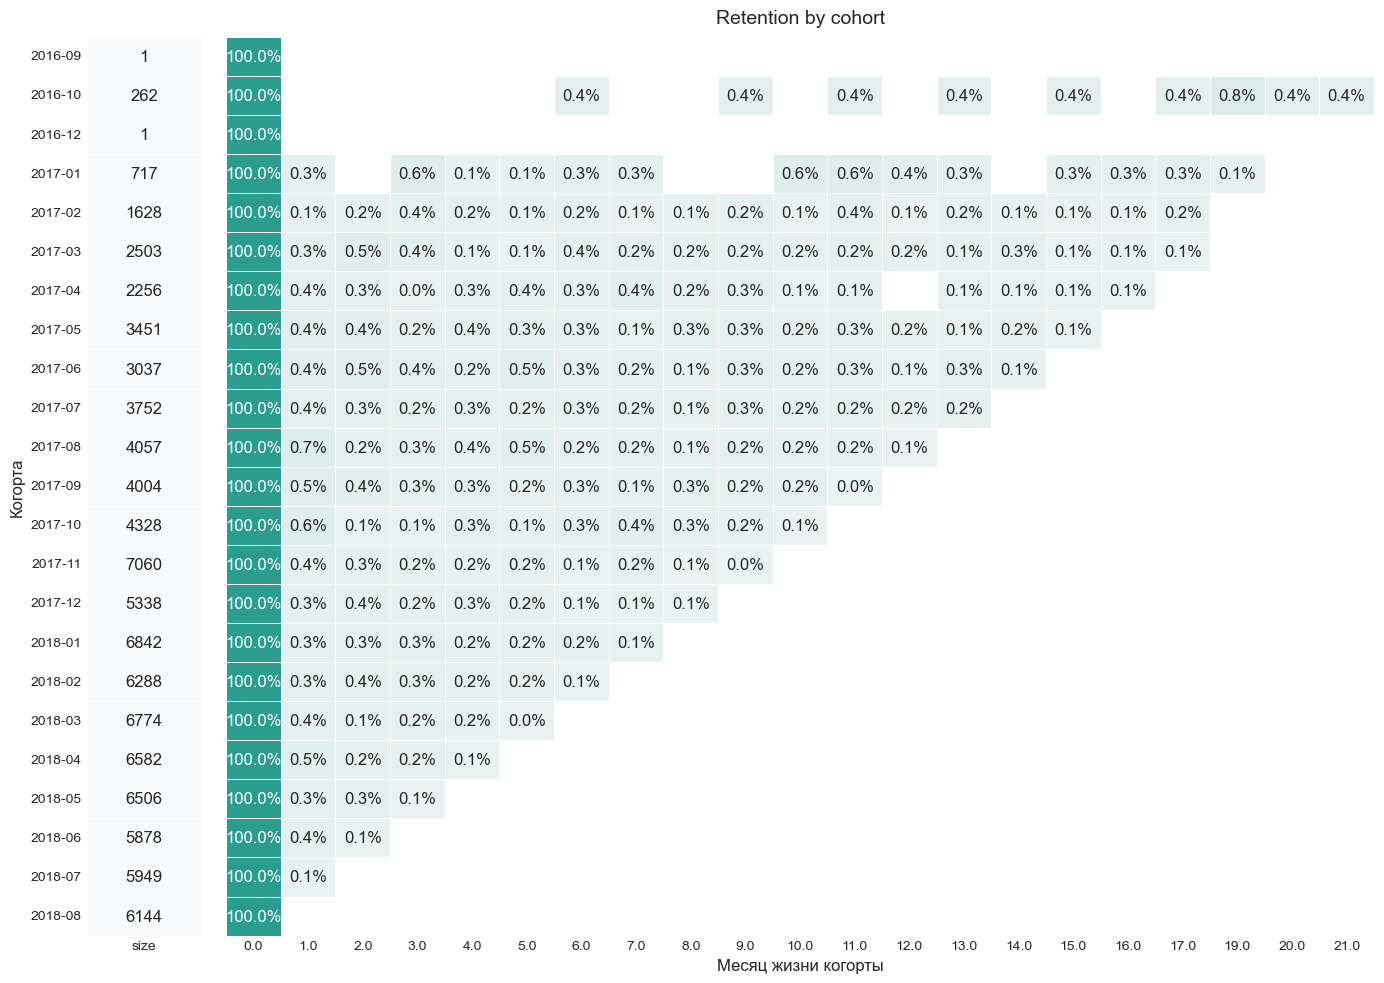

In [88]:
cmap = sns.light_palette(ACCENT, n_colors=100, as_cmap=True)
norm = mcolors.TwoSlopeNorm(vmin=0, vcenter=0.05,
                            vmax=retention_matrix.max().max())

#Размер когорты + retention 
fig, ax = plt.subplots(1, 2, figsize=(14, 10), sharey=True,
                       gridspec_kw={'width_ratios': [1, 10]})

cohort_size_df = (
    cohort_size.reset_index()
                .rename(columns={'index': 'cohort', 0: 'size'})
                .set_index('cohort')
)

sns.heatmap(cohort_size_df, annot=True, fmt='g', cmap=['#f8f9fa'],
            cbar=False, linewidths=.4, linecolor='white', ax=ax[0])
ax[0].set_ylabel('Когорта', fontsize=12)
ax[0].set_xlabel('')

sns.heatmap(retention_matrix, mask=retention_matrix.isnull(), cmap=cmap, norm=norm,
            annot=True, fmt='.1%', linewidths=.4, linecolor='white', cbar=False, ax=ax[1])
ax[1].set_title('Retention by cohort', fontsize=14, pad=10)
ax[1].set_xlabel('Месяц жизни когорты', fontsize=12)
ax[1].set_ylabel('')

for a in ax:
    for spine in a.spines.values():
        spine.set_visible(False)
    a.tick_params(axis='both', length=0)

plt.tight_layout()
plt.show()

In [89]:
print(f"Медианный retention для 1-го месяца: {retention_matrix[1].median():.2%}")

Медианный retention для 1-го месяца: 0.35%


In [90]:
print(f"Максимальный retention для 3-го месяца: {retention_matrix[3].max():.2%}")

Максимальный retention для 3-го месяца: 0.56%


/var/folders/9p/7lld845n4hs8rp09pw3p8vfc0000gn/T/ipykernel_38417/2003155580.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


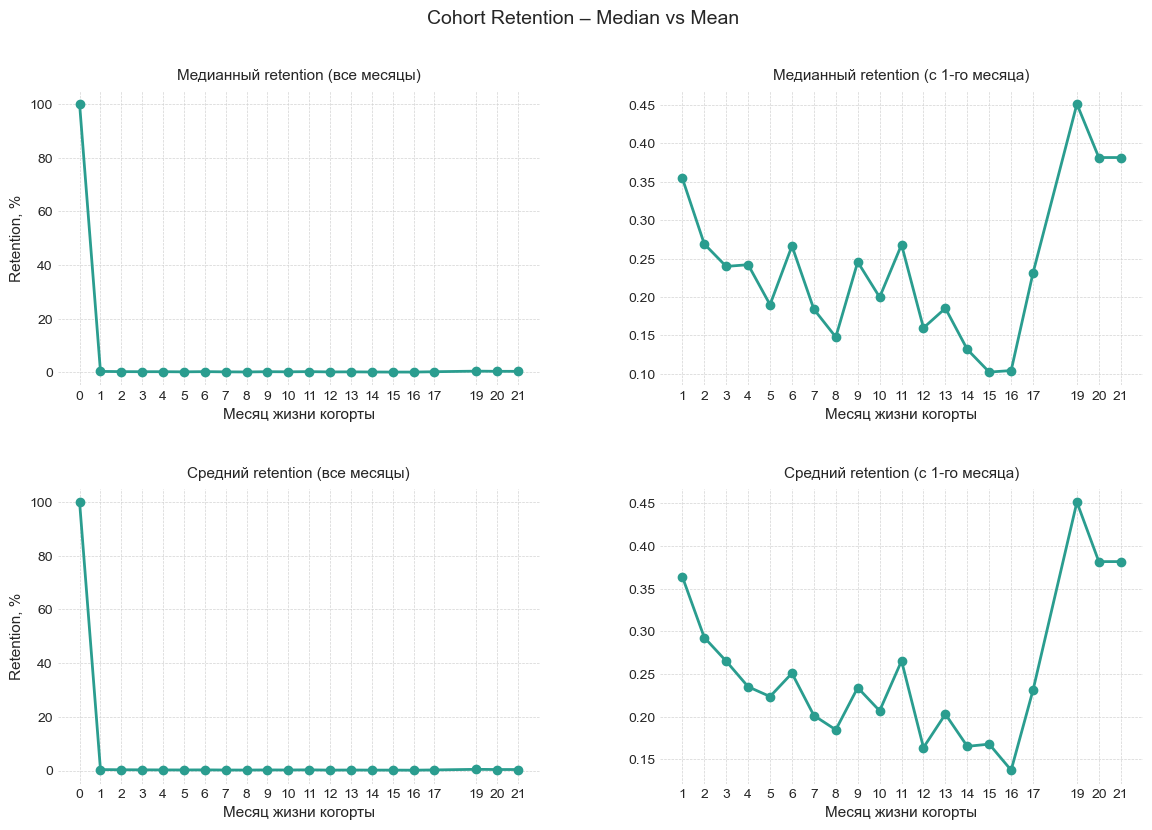

In [91]:
median_by_m = retention_matrix.median(axis=0, skipna=True)
mean_by_m   = retention_matrix.mean(axis=0,   skipna=True)

median_pct = median_by_m * 100
mean_pct   = mean_by_m   * 100
median_zoom = median_pct.drop(labels=0, errors='ignore')
mean_zoom   = mean_pct.drop(labels=0,   errors='ignore')

fig, axes = plt.subplots(2, 2, figsize=(14, 9),
                         gridspec_kw={'hspace': 0.35, 'wspace': 0.25})

def line(ax, x, y, title, ylabel=""):
    ax.plot(x, y, marker='o', linewidth=2, color=ACCENT)  # добавлен marker='o'
    ax.set_title(title, pad=8, fontsize=11)
    ax.set_xlabel("Месяц жизни когорты")
    if ylabel:
        ax.set_ylabel(ylabel)
    ax.set_xticks(x.astype(int))
    ax.grid(True)
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(axis='both', length=0)

line(axes[0, 0], median_pct.index, median_pct.values,
     "Медианный retention (все месяцы)", "Retention, %")
line(axes[0, 1], median_zoom.index, median_zoom.values,
     "Медианный retention (с 1-го месяца)")
line(axes[1, 0], mean_pct.index, mean_pct.values,
     "Средний retention (все месяцы)", "Retention, %")
line(axes[1, 1], mean_zoom.index, mean_zoom.values,
     "Средний retention (с 1-го месяца)")

plt.suptitle("Cohort Retention – Median vs Mean", fontsize=14, y=0.97)
plt.tight_layout()
plt.show()

In [92]:
PLATEAU_MONTHS  = [4, 5, 6]   # плато смотрим на 4-6-м месяцах
PMF_THRESHOLD   = 0.15        # 15 % — условный порог «есть PMF»


m1_median       = median_by_m[1]                             # возврат в 1-й месяц
plateau_median  = median_by_m[PLATEAU_MONTHS].mean()         # среднее «плато»
pmf_exists      = plateau_median >= PMF_THRESHOLD            # True / False

print("==============================================")
print(f"Median M1 retention       : {m1_median   :>7.2%}")
print(f"Mean plateau (M4-M6)       : {plateau_median:>7.2%}")
print(f"PMF detected?              : {'YES ✅' if pmf_exists else 'NO ❌'}")
print("==============================================\n")

Median M1 retention       :   0.35%
Mean plateau (M4-M6)       :   0.23%
PMF detected?              : NO ❌



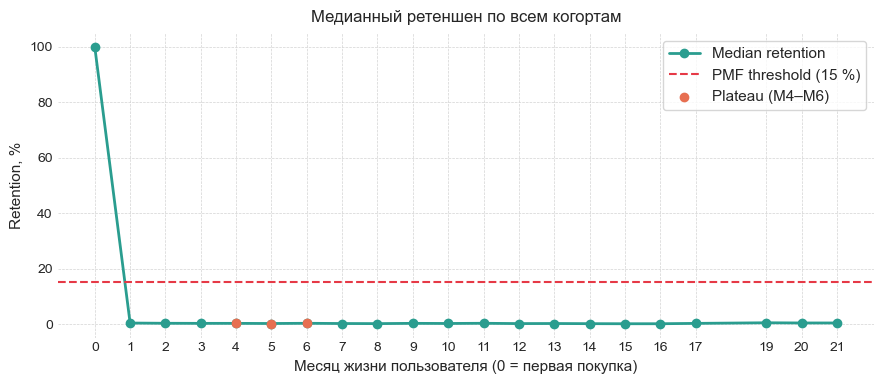

In [93]:
plt.figure(figsize=(9, 4))
ax = plt.gca()

ax.plot(median_by_m.index.astype(int), median_by_m.values * 100,
        marker='o', linewidth=2, color=ACCENT, label='Median retention')
ax.axhline(PMF_THRESHOLD * 100, ls='--', lw=1.5, color=THRESHOLD_C,
           label='PMF threshold (15 %)')
ax.scatter(list(PLATEAU_MONTHS),                      # список → чтобы не было IndexingError
           median_by_m.loc[list(PLATEAU_MONTHS)] * 100,
           color=HIGHLIGHT, zorder=3, label='Plateau (M4–M6)')

ax.set_title("Медианный ретеншен по всем когортам", pad=8, fontsize=12)
ax.set_xlabel("Месяц жизни пользователя (0 = первая покупка)")
ax.set_ylabel("Retention, %")
ax.set_xticks(median_by_m.index.astype(int))
ax.grid(True)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(axis='both', length=0)
ax.legend()
plt.tight_layout()
plt.show()

#### Вывод


1) Наблюдаем плато после 3–6 месяцев.
2) Удержание клиентов на 4-6 месяцы ~0,2 %.
3) Первое падение (M1)	~ 0,35 %.
4) PMF пока нет.

Пользователи массово пробуют маркетплейс один раз и не возвращаются. 

Это отражается и на выручке, которая «стоит на месте» — база активных покупателей не растёт, LTV минимален.

#### 3.3 Пять основных метрик

1) В качестве первой метрики, отражающей рост объёма продаж маркетплейса, выберем валовый оборот и его рост GMV и темп прироста GMV.
Чем больше денег проходит через маркетплейс, тем выше потенциальная выручка (комиссия, логистическая маржа).
Темп роста, а не абсолют, важен как ранний индикатор того, замедляется ли бизнес.

2) Второй метрикой — показывавающей объем аудитории, которой продукт доставляет ценность выберем MAU-B.
Показывает, сколько уникальных людей реально получают ценность (получили доставленный заказ)


3) Третьей метрикой  — отражающая  заинтересованность новых клиентов в продукте (даже если вы не можете посчитать ее на имеющихся у вас данных). Будет количество новых пользователей. Рост MAU без притока новых пользователей перестанет наращивать GMV


4) Четвёртая метркиа — отражающая вовлеченность клиента в продолжение использования продукта Repeat Buyer Rate. Удержание — главный фактор рентабельности: LTV при повторных покупках выше стоимости первой продажи.


5) Пятая метрика — отражающая денежное выражение вовлеченности клиента Average Revenue per User (Buyer) (Средний доход на одного активного покупателя). Позволяет связать рост аудитории и продаж с прибыльностью

In [94]:
#Объеденим доставленные заказы с товарными позициями
orders_items = pd.merge(
    orders_delivered, items, on='order_id', how='left'
)

In [95]:
#GMV и его рост
gmv_monthly     = orders_items.groupby('order_period')['price'].sum()
gmv_growth_pct  = gmv_monthly.pct_change().mul(100).fillna(0)
gmv_growth_pct_sub = gmv_growth_pct[gmv_growth_pct.index >= pd.Period('2017-02', freq='M')]

In [96]:
#MAU
mab_monthly     = orders_delivered.groupby('order_period')['customer_unique_id'].nunique()

In [97]:
#Новые покупатели
first_purchase_month = orders_delivered.groupby('customer_unique_id')['order_period'].min()
new_buyers_monthly   = first_purchase_month.value_counts().sort_index()

In [98]:
#Repeat Buyer Rate
orders_delivered['is_returning'] = orders_delivered.apply(
    lambda r: r['order_period'] > first_purchase_month[r['customer_unique_id']], axis=1
)

In [99]:
returning_buyers = (
    orders_delivered[orders_delivered['is_returning']]
    .groupby('order_period')['customer_unique_id']
    .nunique()
)

In [100]:
rbr_monthly = (returning_buyers / mab_monthly).fillna(0).mul(100)  # %

In [101]:
#ARPU
arab_monthly = (gmv_monthly / mab_monthly).fillna(0)

In [102]:
#Статистика ARPU
arab_monthly.describe()

count     23.000000
mean     134.966969
std       28.081096
min       10.900000
25%      134.024653
50%      140.654858
75%      145.205188
max      155.708022
dtype: float64

In [103]:
#Функция для построения графиков
def plot(series, title, ylab, percent=False):
    idx = series.index.astype(str)
    plt.figure(figsize=(9,4))
    plt.plot(idx, series.values, color=ACCENT, marker='o', lw=2)
    plt.title(title, pad=8); plt.xlabel('Month'); plt.ylabel(ylab)
    plt.xticks(rotation=45, ha='right')
    if percent:
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.grid(True); [sp.set_visible(False) for sp in plt.gca().spines.values()]
    plt.tight_layout(); plt.show()

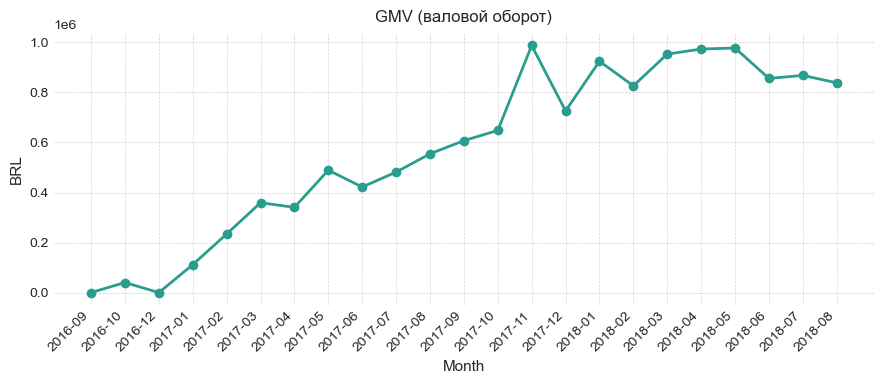

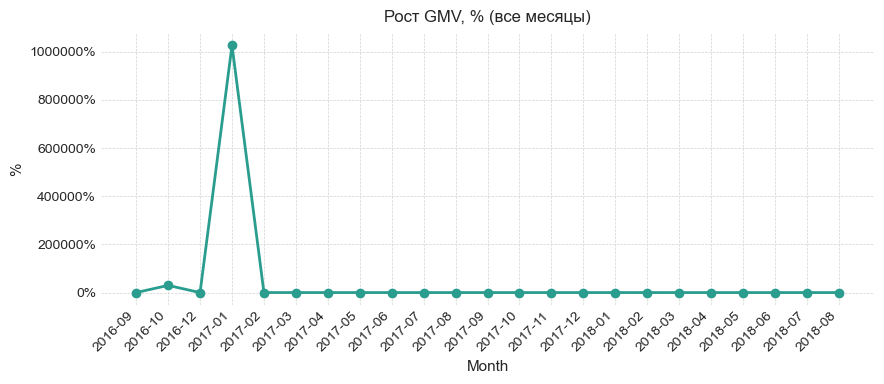

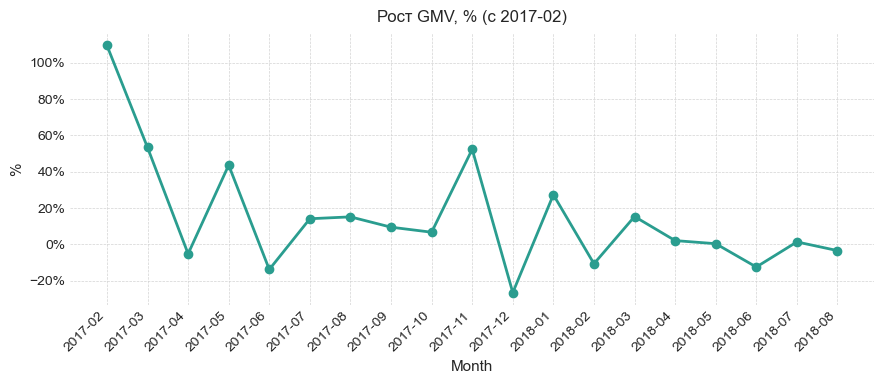

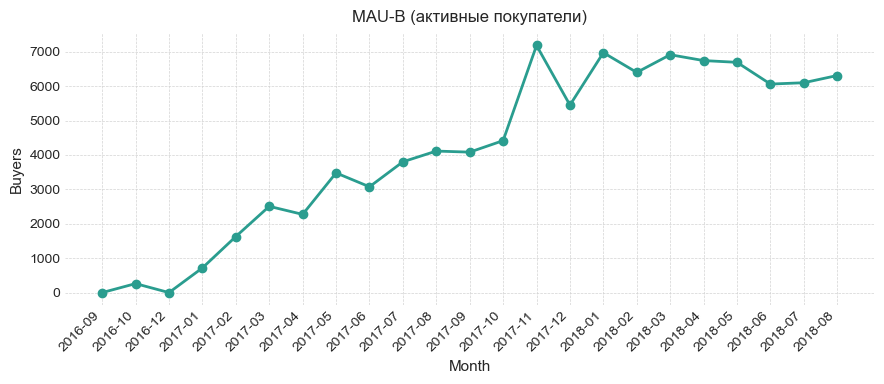

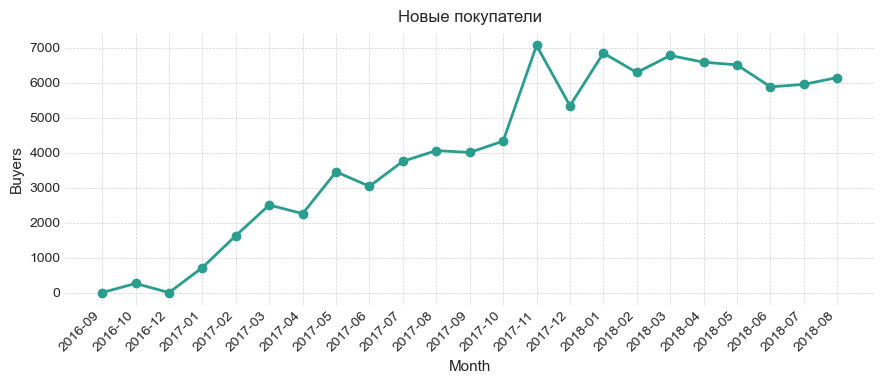

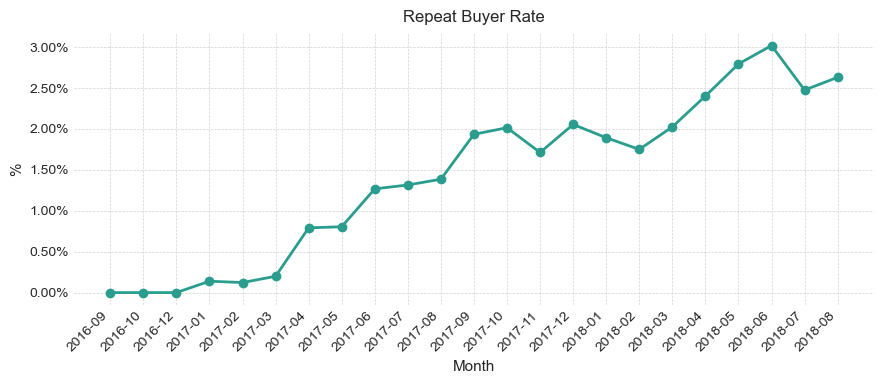

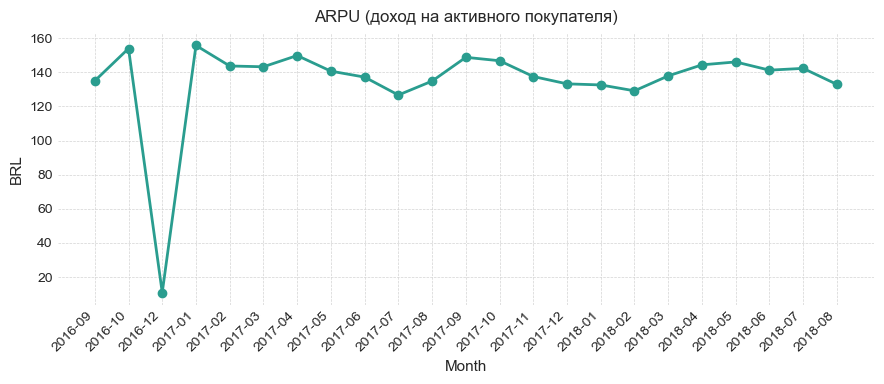

In [104]:
#Построим графики по всем метрикам
plot(gmv_monthly,        "GMV (валовой оборот)",                   "BRL")
plot(gmv_growth_pct,     "Рост GMV, % (все месяцы)",               "%",  True)
plot(gmv_growth_pct_sub, "Рост GMV, % (с 2017-02)",                "%",  True)   # ← новый
plot(mab_monthly,        "MAU-B (активные покупатели)",            "Buyers")
plot(new_buyers_monthly, "Новые покупатели",                       "Buyers")
plot(rbr_monthly,        "Repeat Buyer Rate",                      "%",  True)
plot(arab_monthly,       "ARPU (доход на активного покупателя)",   "BRL")

#### Вывод
1) GMV (валовой оборот) постепенный рост и выход на плато к весне 2018 года.
2) GMV growth (темп прироста валового оборота) показывает высокую волатильность и видимо зависит от сезонности и акций/распродаж. Так же видим взрывной рост в январе 2017, скорее всего вызванный эффектом низкой базы только что открывшегося маркетплейса.
3) MAU (активные пользователи) так же как и GMV плавно растет до 2018 года и выходит на плато.
4) Новые покупатели - график практически повторяет активных пользователей, количество купивших впервые в этом месяце практически равно всем купившим в этом месяце.
5) Repeat Buyer Rate (доля клиентов сделавших 2 и более покупок в тот же месяц). Показывает плавный рост, не видно плато, не наблюдается большой волатильности, но сами значения (в пике 3%) все еще крайне низки. 97% покупателей не делают повторной покупки.
6) Average Revenue per Active Buyer (доход на активного покупателя) - стабильно калеблется в районе 140 реалов.

*Рост валового оборота держится только за счет новых пользователей и приростает на акциях и распродажах. Retention остается крайне низким, практически вся активная аудитория это новые покупатели совершившие всего одну покупку. Монетизация с одного клиента стабильна, но при снижении притока новых пользователей все показатели обрушатся.*

*Маркетплейс не плохо привлекал новых пользователей до 2018 года, но практически их не удерживал. Необходимо переходить от быстрокго роста к удержанию пользователей. Требуется увеличение Retention, RBR и конверсии во вторую покупку*

#### 3.4 Анализ гипотез

Выберем одну из 3 гипотез с помощью фреймворка ICE:

1) Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.

2) Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов.

3) Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов тех, кто раньше не делал повторный заказ.


Для расчёта `Impact` возьмем данные с июня 2017 года. Будем считать, что конверсия в повторный заказ равна величине медианного retention 1-го месяца 

In [105]:
#Выберем данные с июня 2017 года
mask = orders['order_purchase_timestamp'] >= pd.Timestamp('2017-06-01')

In [106]:
orders_since_june2017 = orders.loc[mask]

**Посмотрим на отмененные заказы (Гипотеза 1)**

In [107]:
#Посмотрим статусы всех заказов за этот период
vc = orders_since_june2017['order_status'].value_counts()
vc

order_status
delivered      85413
shipped          912
canceled         499
unavailable      475
invoiced         240
processing       202
created            5
Name: count, dtype: int64

In [108]:
#Количество отмененных заказов
total_cancel = vc.loc[['canceled', 'unavailable']].sum()
total_cancel

np.int64(974)

In [109]:
#Посмотрим на отмененные заказы 
orders_canceled_june2017 = orders_since_june2017.query(
    "order_status in ['canceled', 'unavailable']"
)

In [110]:
orders_canceled_june2017['order_purchase_timestamp'].min()

Timestamp('2017-06-02 10:27:06')

In [111]:
orders_canceled_june2017['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

In [112]:
#Подготовим данные
df = orders_since_june2017.copy()
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['year_month'] = df['order_purchase_timestamp'].dt.to_period('M')


In [113]:
#Всего заказов по месяцам
monthly_total = (
    df
    .groupby('year_month').size()
    .reset_index(name='total_orders')
)

In [114]:
monthly_total

,year_month,total_orders
0,2017-06,3245
1,2017-07,4026
2,2017-08,4331
3,2017-09,4285
4,2017-10,4631
5,2017-11,7544
6,2017-12,5673
7,2018-01,7269
8,2018-02,6728
9,2018-03,7211


In [115]:
#Отменённых заказов по месяцам
monthly_canceled = (
    df[df['order_status'].isin(['canceled','unavailable'])]
    .groupby('year_month').size()
    .reset_index(name='canceled_count')
)

In [116]:
monthly_canceled

,year_month,canceled_count
0,2017-06,40
1,2017-07,80
2,2017-08,59
3,2017-09,58
4,2017-10,84
5,2017-11,121
6,2017-12,53
7,2018-01,82
8,2018-02,103
9,2018-03,43


In [117]:
(monthly_canceled['canceled_count'].mean() / monthly_total['total_orders'].mean()) * 100

np.float64(1.110022109269938)

In [118]:
#Объединяем и считаем долю
monthly = (
    pd.merge(monthly_total, monthly_canceled, on='year_month', how='left')
    .fillna(0)
)

In [119]:
monthly['relative'] = monthly['canceled_count'] / monthly['total_orders']
monthly['year_month'] = monthly['year_month'].dt.to_timestamp()


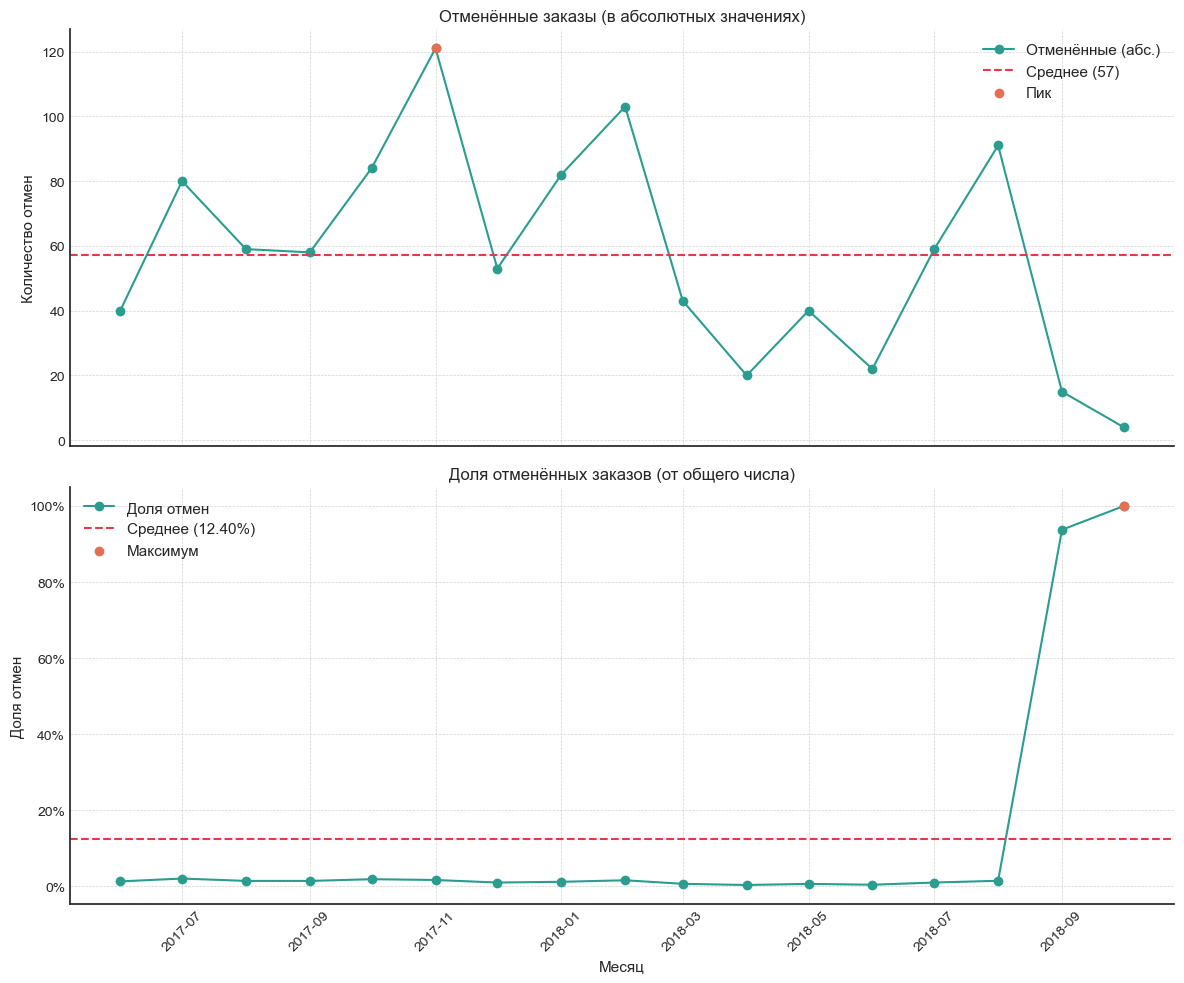

In [120]:
#Построение графиков отменненых заказов
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

#Абсолютные значения
ax1.plot(
    monthly['year_month'], monthly['canceled_count'],
    marker='o', color=ACCENT, label='Отменённые (абс.)'
)
mean_abs = monthly['canceled_count'].mean()
ax1.axhline(mean_abs, color=THRESHOLD_C, linestyle='--', label=f'Среднее ({mean_abs:.0f})')

max_idx_abs = monthly['canceled_count'].idxmax()
ax1.scatter(
    monthly.loc[max_idx_abs, 'year_month'],
    monthly.loc[max_idx_abs, 'canceled_count'],
    color=HIGHLIGHT, zorder=5, label='Пик'
)
ax1.set_title('Отменённые заказы (в абсолютных значениях)')
ax1.set_ylabel('Количество отмен')
ax1.legend(frameon=False)
ax1.grid(True)

#Относительные значения
ax2.plot(
    monthly['year_month'], monthly['relative'],
    marker='o', color=ACCENT, label='Доля отмен'
)
mean_rel = monthly['relative'].mean()
ax2.axhline(mean_rel, color=THRESHOLD_C, linestyle='--', label=f'Среднее ({mean_rel:.2%})')

max_idx_rel = monthly['relative'].idxmax()
ax2.scatter(
    monthly.loc[max_idx_rel, 'year_month'],
    monthly.loc[max_idx_rel, 'relative'],
    color=HIGHLIGHT, zorder=5, label='Максимум'
)
ax2.set_title('Доля отменённых заказов (от общего числа)')
ax2.set_ylabel('Доля отмен')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.0%}"))
ax2.legend(frameon=False)
ax2.grid(True)

plt.xticks(rotation=45)
plt.xlabel('Месяц')
plt.tight_layout()
plt.show()

In [121]:
#Impact
hyp_1 = total_cancel
hyp_1

np.int64(974)

In [122]:
#Баллы
ICE_1 = 5 * 8 * 6

In [123]:
ICE_1

240

На графиках чётко прослеживается, что пик абсолютного числа отмен приходится на ноябрь 2017 — скорее всего из-за «Чёрной пятницы», когда и объём всех заказов был максимальным. 

В большинство месяцев пики отмен действительно совпадают с пиками общего числа заказов, поэтому относительная доля отмен остаётся практически неизменной на уровне ~1–2 %.

Исключение составляют два последних (неполных) месяца выборки: когда всего было сделано 16 заказов и 15 из них отменились, а затем 4 заказа — и все 4 отмены. 

Из-за крайне малого объёма выборки в эти периоды доля отмен искусственно взлетела до 94 % и 100 %.

* Общее количество отмен: 974
* Среднее количество отмен (отн.): 1.11%
* Сренее количество отмен в месяц 57.

ICE первой гипотезы = 240

**Посмотрим время доставки (Гипотеза 2)**

In [124]:
#Подготовка данных
df_h2 = orders_since_june2017.copy()
df_h2['order_delivered_customer_date'] = (df_h2['order_delivered_customer_date']).dt.date
df_h2['order_purchase_timestamp'] = (df_h2['order_purchase_timestamp']).dt.date
df_h2['order_estimated_delivery_date'] = (df_h2['order_estimated_delivery_date']).dt.date

In [125]:
df_h2['late_days'] = pd.to_timedelta(df_h2['order_delivered_customer_date'] - df_h2['order_estimated_delivery_date']).dt.days

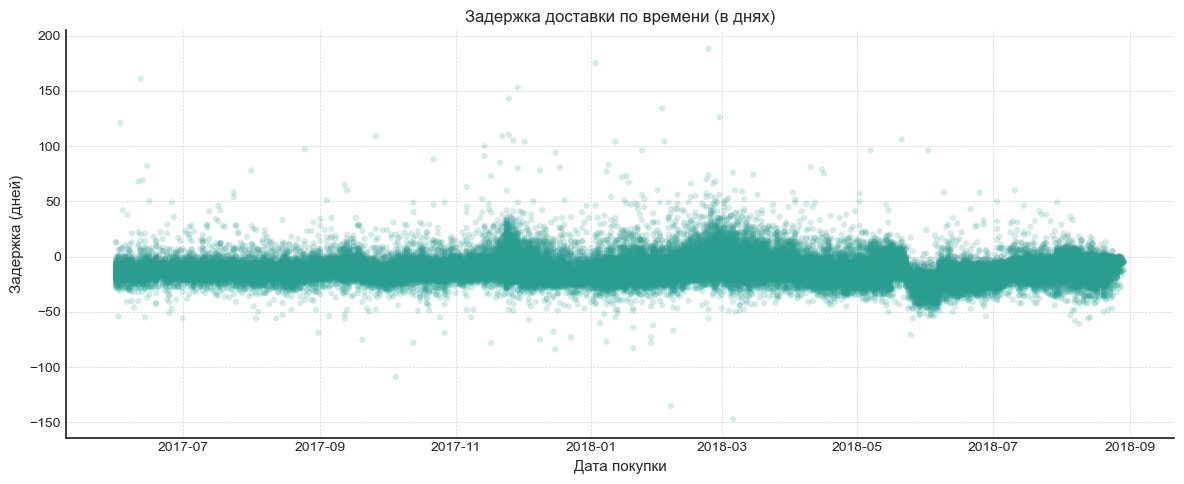

In [126]:
#График задержки доставки
plt.figure(figsize=(12, 5))
plt.scatter(
    df_h2['order_purchase_timestamp'],
    df_h2['late_days'],
    alpha=0.2,
    color=ACCENT,
    s=20,
    edgecolor='none'
)
plt.title('Задержка доставки по времени (в днях)')
plt.xlabel('Дата покупки')
plt.ylabel('Задержка (дней)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [127]:
#Описательная статистика по задержке заказов
df_h2['late_days'].describe()

count    85407.000000
mean       -11.410716
std          9.701418
min       -147.000000
25%        -16.000000
50%        -12.000000
75%         -7.000000
max        188.000000
Name: late_days, dtype: float64

In [128]:
#Количество доставок с задержкой больше 1 дня
total_late = df_h2.query('late_days>0').shape[0]

In [129]:
#Отфильтруем выбросы менее -60 и более 60
df_no_outliers_h2 = df_h2.query('-60<late_days<60')

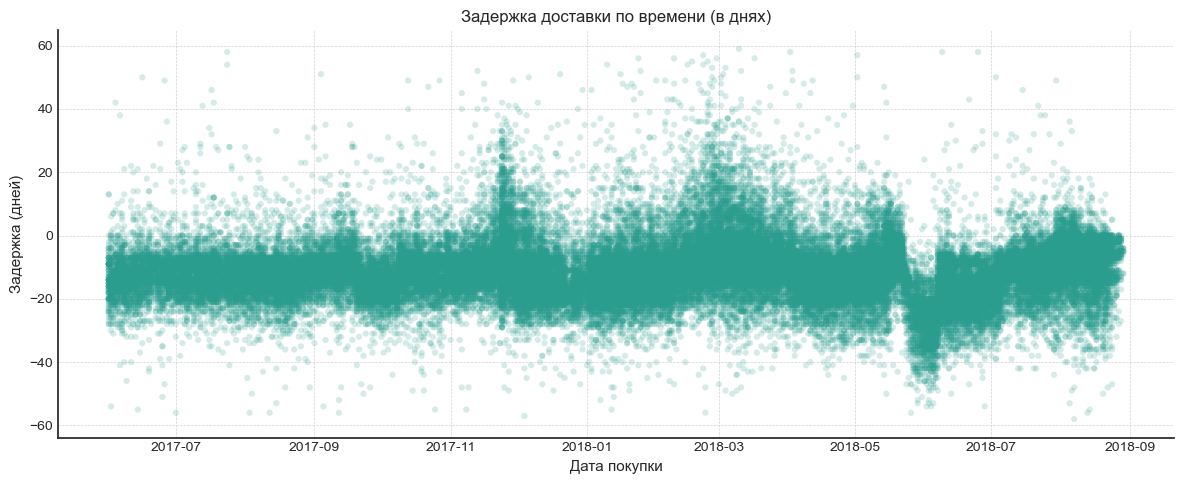

In [130]:
#График задержки доставки без выбросов
plt.figure(figsize=(12, 5))
plt.scatter(
    df_no_outliers_h2['order_purchase_timestamp'],
    df_no_outliers_h2['late_days'],
    alpha=0.2,
    color=ACCENT,
    s=20,
    edgecolor='none'
)
plt.title('Задержка доставки по времени (в днях)')
plt.xlabel('Дата покупки')
plt.ylabel('Задержка (дней)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [131]:
#Описательная статистика по задержке заказов без выбросов
df_no_outliers_h2['late_days'].describe()

count    85330.000000
mean       -11.459416
std          9.245965
min        -58.000000
25%        -16.000000
50%        -12.000000
75%         -7.000000
max         59.000000
Name: late_days, dtype: float64

In [132]:
df_h2['days_delivery'] = pd.to_timedelta(df_h2['order_delivered_customer_date'] - df_h2['order_purchase_timestamp']).dt.days

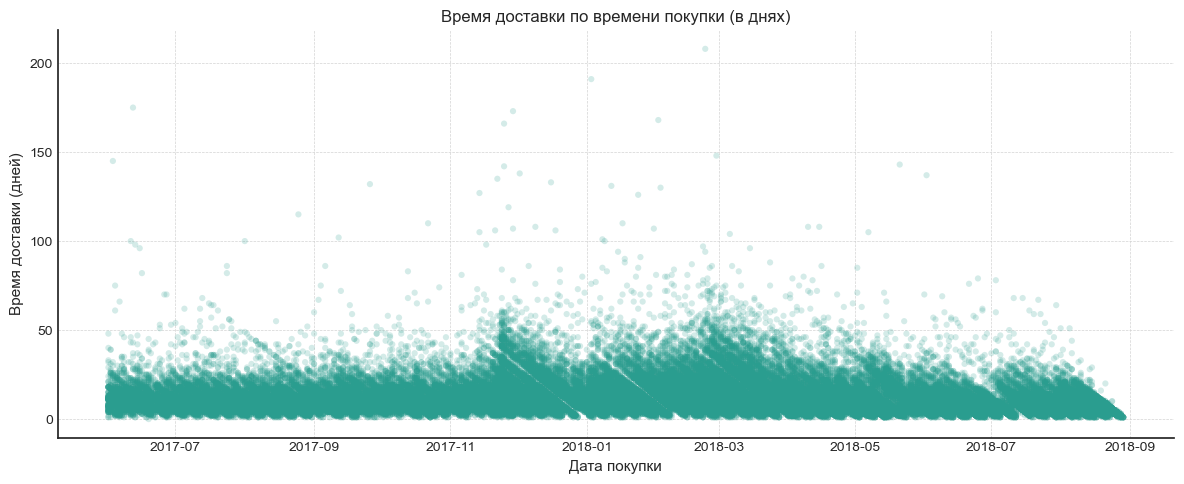

In [133]:
#График времени доставки (дней)
plt.figure(figsize=(12, 5))
plt.scatter(
    df_h2['order_purchase_timestamp'],
    df_h2['days_delivery'],
    alpha=0.2,
    color=ACCENT,
    s=20,
    edgecolor='none'
)
plt.title('Время доставки по времени покупки (в днях)')
plt.xlabel('Дата покупки')
plt.ylabel('Время доставки (дней)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [134]:
#Описательная статистика времени доставки
df_h2['days_delivery'].describe()

count    85407.000000
mean        12.416664
std          9.317330
min          0.000000
25%          6.000000
50%         10.000000
75%         16.000000
max        208.000000
Name: days_delivery, dtype: float64

In [135]:
#Отфильтруем выбросы, более 80 дней
df_no_outliers_h2 = df_h2.query('days_delivery<80')

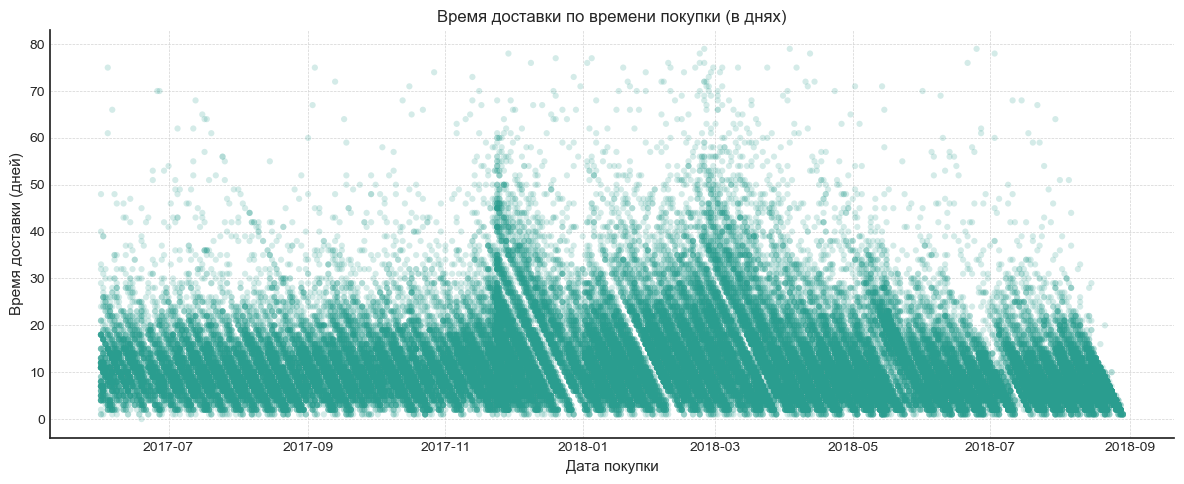

In [136]:
#График времени доставки (дней) без выбросов
plt.figure(figsize=(12, 5))
plt.scatter(
    df_no_outliers_h2['order_purchase_timestamp'],
    df_no_outliers_h2['days_delivery'],
    alpha=0.2,
    color=ACCENT,
    s=20,
    edgecolor='none'
)
plt.title('Время доставки по времени покупки (в днях)')
plt.xlabel('Дата покупки')
plt.ylabel('Время доставки (дней)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [137]:
#Описательная статистика времени доставки без выбросов 
df_no_outliers_h2['days_delivery'].describe()

count    85330.000000
mean        12.331407
std          8.836637
min          0.000000
25%          6.000000
50%         10.000000
75%         16.000000
max         79.000000
Name: days_delivery, dtype: float64

In [138]:
#Impact
hyp2 = total_late * retention_matrix[1].median()
hyp2

np.float64(21.588652482269502)

In [139]:
#Баллы
ICE_2 = 1 * 10 * 4 
ICE_2

40

Компания значительно «страхует» сроки.
75 % заказов приходят как минимум на 7 дней раньше оценки; средняя опережающая доставка — 11 дней.

Абсолютное время пути посылки держится в пределах 6-16 дней для половины заказов, что приемлемо для nationwide-логистики.

Всплеск задержек и длинных доставок совпадает по времени с ноя-дек 2017 / янв-мар 2018 — периодом пикового спроса («чёрная пятница», новогодние праздники). 

Вероятно, транспортная сеть была перегружена.

Редкие экстремумы (+150…200 дн.) и отрицательные –147 дн. указывают на ошибки данных или единичные крайне проблемные заказы; их доля микроскопична, но они искажают max/min.

Стандартные отклонения схожи (~9-10 дн.), что подтверждает: основная «турбулентность» обусловлена разбросом фактического срока доставки, а не ошибкой в оценке.

ICE второй гипотезы = 40 

**Срок оплаты и повторные заказы (Гипотеза 3)** 

In [140]:
#Подготовка данных
df_h3 = orders_since_june2017.copy()

In [141]:
df_h3['order_approved_at'] = pd.to_datetime(df_h3['order_approved_at'], errors='coerce')
df_h3['order_purchase_timestamp'] = pd.to_datetime(df_h3['order_purchase_timestamp'], errors='coerce')

In [142]:
df_h3['hours_to_approval'] = (
    df_h3['order_approved_at']
  - df_h3['order_purchase_timestamp']
) / np.timedelta64(1, 'h')

In [143]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02
...,...,...,...,...,...,...,...,...,...
99433,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07,2017-10
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017-08
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-01


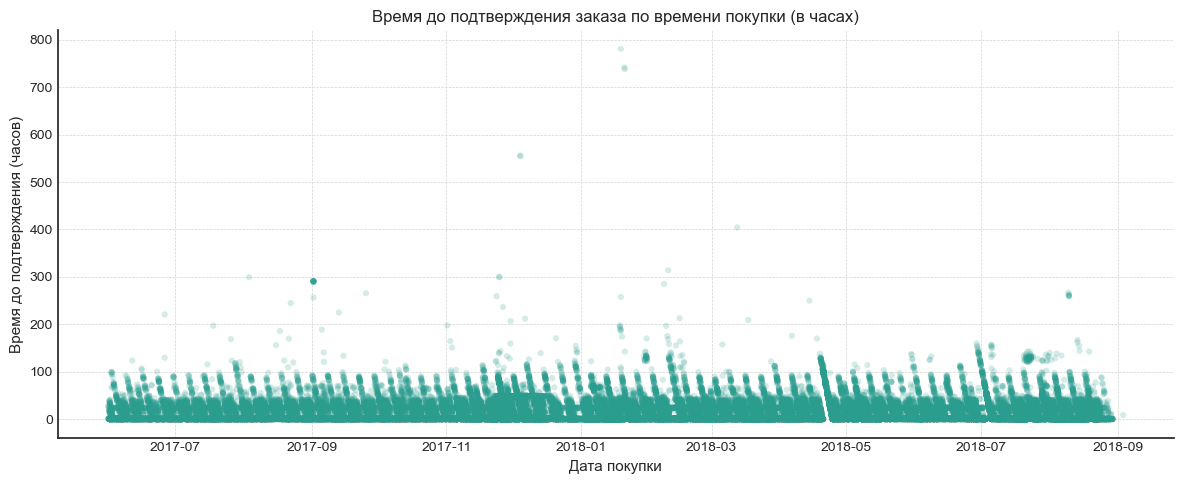

In [144]:
#График времени подтверждения заказа 
plt.figure(figsize=(12, 5))
plt.scatter(
    df_h3['order_purchase_timestamp'],
    df_h3['hours_to_approval'],
    alpha=0.2,
    color=ACCENT,
    s=20,
    edgecolor='none'
)
plt.title('Время до подтверждения заказа по времени покупки (в часах)')
plt.xlabel('Дата покупки')
plt.ylabel('Время до подтверждения (часов)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [145]:
#Описательная статистика времени подтверждения заказа
df_h3['hours_to_approval'].describe()

count    87624.000000
mean        10.364523
std         20.705184
min          0.089722
25%          0.224167
50%          0.361111
75%         14.800903
max        780.855000
Name: hours_to_approval, dtype: float64

In [146]:
#Отфильтруем времени подтверждения заказа > 200
df_no_outliers_h3 = df_h3.query('hours_to_approval < 200').copy()

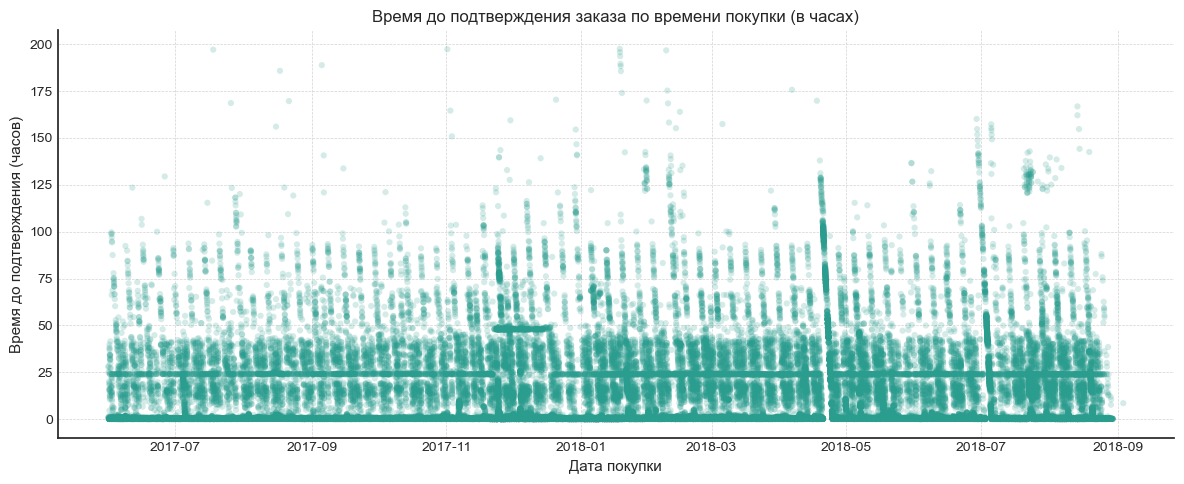

In [147]:
#График времени подтверждения заказа без выбросов
plt.figure(figsize=(12, 5))
plt.scatter(
    df_no_outliers_h3['order_purchase_timestamp'],
    df_no_outliers_h3['hours_to_approval'],
    alpha=0.2,
    color=ACCENT,
    s=20,
    edgecolor='none'
)
plt.title('Время до подтверждения заказа по времени покупки (в часах)')
plt.xlabel('Дата покупки')
plt.ylabel('Время до подтверждения (часов)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [148]:
#Описательная статистика времени подтверждения заказа без выбросов
df_no_outliers_h3['hours_to_approval'].describe()

count    87582.000000
mean        10.216650
std         19.338493
min          0.089722
25%          0.224167
50%          0.360833
75%         14.744444
max        197.491667
Name: hours_to_approval, dtype: float64

In [149]:
#Пометим повторных клиентов (более одного заказа)
df_h3 = df_h3.merge(customers[['customer_id', 'customer_unique_id']],
                  on='customer_id', how='left')
order_counts = df_h3.groupby('customer_unique_id')['order_id'].transform('count')
df_h3['is_repeat_customer'] = (order_counts > 1).astype(int)

#Корреляция между признаком повтора и временем до подтверждения
corr_value = df_h3['is_repeat_customer'].corr(df_h3['hours_to_approval'])
print(f"Корреляция Пирсона (repeat vs hours_to_approval): {corr_value:.4f}")

#Сводная статистика по повторному заказу
summary = (
    df_h3.groupby('is_repeat_customer')['hours_to_approval']
         .agg(['count', 'mean', 'median', 'std'])
         .rename(index={0: 'Одноразовый заказ', 1: 'Повторный заказ'})
)

print("\nСводная статистика времени до подтверждения:")
print(summary.to_string())

Корреляция Пирсона (repeat vs hours_to_approval): -0.0049

Сводная статистика времени до подтверждения:
                    count       mean    median        std
is_repeat_customer                                       
Одноразовый заказ   82495  10.390015  0.361944  20.735975
Повторный заказ      5129   9.954517  0.344722  20.201051


In [150]:
#Количество пользователей, сделавших 1 заказ
single_order_customers = order_counts[order_counts == 1].count()
single_order_customers

np.int64(82559)

In [151]:
#Impact
hyp3 = single_order_customers * retention_matrix[1].median()
hyp3

np.float64(292.76241134751774)

In [152]:
#Баллы
ICE_3 = 3 * 5 * 9
ICE_3

135

#### Вывод
Связь между скоростью подтверждения заказа (оплатой) и повторной покупкой:
Корреляция `is_repeat_customer` vs `hours_to_approval` = -0.005 (фактически ноль).

Среднее время до подтверждения:

одноразовые клиенты — 10.39 ч

повторные — 9.95 ч


Разница статистически незначима при таком разбросе (std ≈ 20 ч).

Cкорость подтверждения заказа (оплаты) не является драйвером повторных покупок.

Ни одна когорта не показывает резкого “улучшения” retention, которое совпадало бы с заметным сдвигом распределения `hours_to_approval` на графиках.

Общая проблема удержания гораздо шире, чем только задержки при оплате — пользователи почти не возвращаются независимо от того, как быстро прошла оплата.

Итого: существующие данные не подтверждают, что именно скорость/удобство платежа является “бутылочным горлом” для повторных продаж.

ICE третьей гипотезы 135


***По фреймворку ICE выбираем первую гипотезу со значением 240***

#### 3.5 Метрики Гипотезы 1 «Исправление бага в системе процессинга заказов»


| Категория | Метрика | Формула | Ожидаемое изменение | Обоснование |
|-----------|---------|-------------------|---------------------|-------------|
| **Целевые (Target)** | **Cancellation Rate** | число заказов со статусами *canceled* и *unavailable* ÷ общее число созданных заказов | Значимое **снижение** | Прямой индикатор того, что баг устранён и клиенты реже сталкиваются с отменой. |
| | **Delivered Rate** | число заказов со статусом *delivered* ÷ общее число созданных заказов | Заметный **рост** | Зеркальная метрика: если отмен меньше, доля успешно доставленных заказов должна увеличиться. |
| **Промежуточная (Proxy)** | **Изменение GMV по доставленным заказам** | сумма *цена × кол-во* для всех доставленных товаров | **Рост** совокупной выручки | Быстрый денежный эффект при тех же затратах на трафик. |
| **Защитные (Guardrail)** | **Средняя задержка доставки** | среднее значение положительной разницы «фактическая дата – обещанная дата» | **Не должна увеличиваться** | Проверяем, что исправление отмен не замедлило логистику. |
| | **Доля подтверждённых оплат (Approval Conversion)** | число заказов со статусом *approved* ÷ общее число созданных заказов | **Не должна снижаться** | Убеждаемся, что изменения не повредили платёжному процессу или антифрод-фильтру. |

### Критерий успеха эксперимента
* Cancellation Rate статистически значимо уменьшается **и одновременно** Delivered Rate статистически значимо увеличивается.  
* Guardrail-метрики (средняя задержка и доля подтверждённых оплат) остаются на прежнем уровне или улучшаются.

Если оба условия выполнены, фикс считается успешным и его можно распространять на всех пользователей.


### 4. Отчет

***1. Формализация проблемы продукта***

Клиенты не возвращаются	Медианный retention M+1 = 0,35 %	Продукт не удерживает аудиторию, признаков PMF нет
Рост GMV остановился	GMV и MAU-buyers после весны 2018 выходят на плато	Привлечённый трафик не конвертируется в LTV
Отмены заказов	974 отмен (1,1 % всех заказов), из них ~ 40 % — unavailable	Неэффективный процессинг → упущенная выручка.

***2. Общие выводы по результатам задач 1-5***


Retention-матрица показала, что 99 % покупателей делают ровно один заказ. PMF нет.

Пять ключевых метрик для прибыли:

1) Валовой оборот и темп роста  - GMV & GMV-growth;

2) Активные покупатели в месяц - MAU-buyers;

3) Число новых покупателей; 

4)  Доля повторных покупателей - Repeat Buyer Rate (RBR);
 
5) Средняя выручка на пользователя (покупателя) - ARPU (Avg Revenue per User)

   

**ICE-ранжирование гипотез**

Починка отмен заказов(Impact = 974 заказа, ICE = 240) — первоочерёдно.

Новый способ оплаты (ICE = 180) — следующий быстрый выигрыш.

Сокращение задержек доставки (ICE = 40) — низкий приоритет.



**Метрики A/B-теста гипотезы #1:**

Целевая (Target) — Снижение Cancellation Rate и рост Net Delivery Rate

Промежуточная (Proxy) — GMV рост совокупной выручки

Защитная (Guardrails) — Средняя задержка доставки (Avg Lead Time) не растёт, доля подтвержденных оплат (Payment Approval Rate) не падает.


***3. Рекомендации по продукту***


1) Исправление бага в системе процессинга заказов

2) Сконцентрироваться на статусах canceled + unavailable.

3) Ожидаемый uplift ≈ 974 доставленных заказов  ~140 × 974 ~ 136 000 GMV.

4) Запустить A/B тестирование по Cancellation Rate и Net Delivery Rate.

5) Мониторить RBR и retention M+1.


**Среднесрочно (ICE = 180)** 

1) Добавить альтернативный метод оплаты для «одноразовых» покупателей.

2) Измерять влияние на First-Time Buyer Share и 60-day RBR.



**Стратегически**


1) Ввести персональные кампании тем, кто не купил второй раз через 30 дней.

2) Сегментировать продавцов по частоте отмен — применять штрафы/заморозку витрины.

3) Настроить дашборд по пяти метрикам, обновление — ежедневно.

4) Если все пункты 1-3 дадут заявленный эффект, вернёмся к вопросу PMF и оценим новый retention-plateau.